In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
# Load California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data= np.c_[california_housing['data'], california_housing['target']],
                     columns= california_housing['feature_names'] + ['target'])

# Assume that the sales revenue is related to certain features in the dataset
# Choose relevant features (e.g., median income, housing median age, etc.)
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = data[features]
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (Coefficient of Determination): {r2}')

Mean Squared Error: 0.5558915986952444
R-squared (Coefficient of Determination): 0.5757877060324508


   ** Explanation**: This graph compares our model's predictions with the actual sales revenue.
   ** Interpretation:** Ideally, the points should form a straight line. The closer the points are to this line, the better our model is at predicting sales revenue.

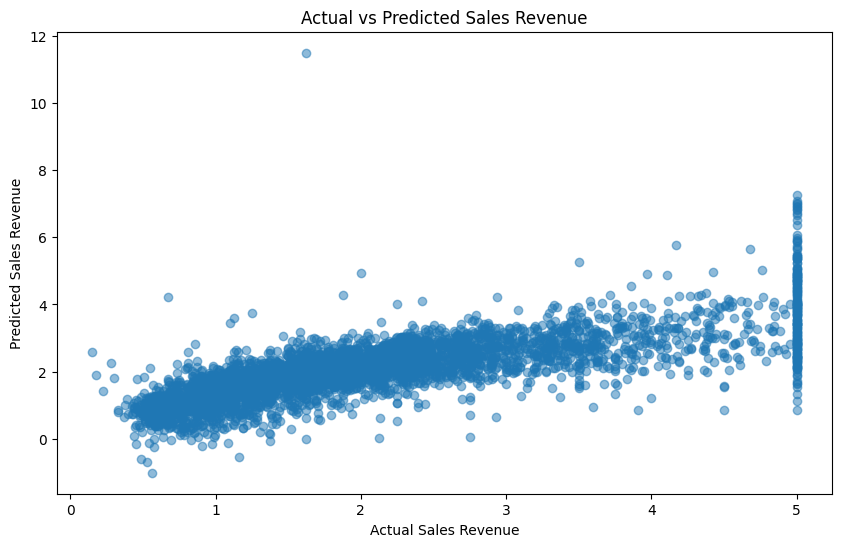

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Sales Revenue')
plt.xlabel('Actual Sales Revenue')
plt.ylabel('Predicted Sales Revenue')
plt.show()

**Explanation:** This graph helps us check if the model's predictions have consistent variability.
**Interpretation: **The points should be evenly spread around the horizontal line at 0 (the red dashed line). If there's a consistent pattern, it suggests our model might need adjustments.

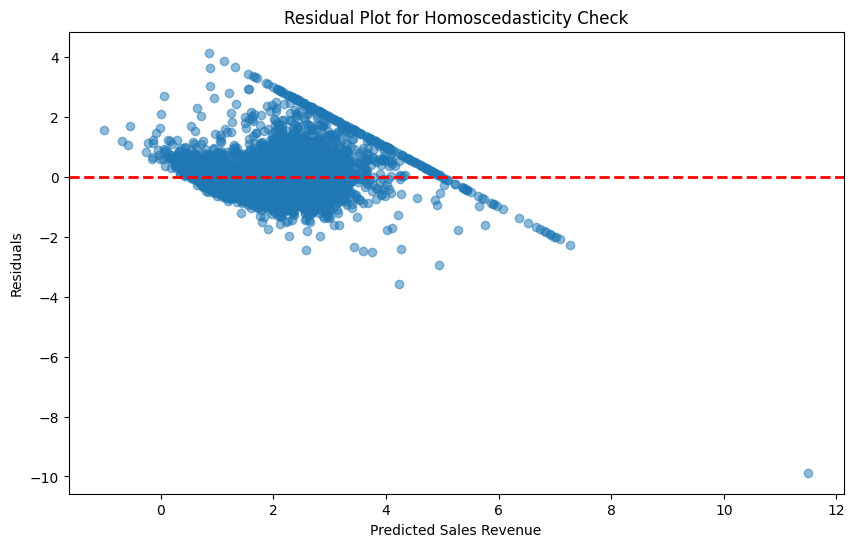

In [4]:
# Residual plot for homoscedasticity check
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot for Homoscedasticity Check')
plt.xlabel('Predicted Sales Revenue')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

**Mean Squared Error (MSE):**

    **Explanation**: MSE measures the average squared difference between our predicted and actual sales revenue.
    **Interpretation:** A lower MSE indicates better accuracy. Ours is 0.5558915986952444
    **Closer to 0**: Indicates a better-performing model with smaller prediction errors.

**R-squared (Coefficient of Determination):**

    **Explanation**: R-squared shows how well our model explains the variability in sales revenue.
    **Interpretation**: A higher R-squared (close to 1) is better. Ours is 0.5757877060324508

**Key Insights for Non-Tech Stakeholders:**

    The model's predictions are fairly aligned with actual sales revenue, as seen in the scatter plot.
    The residual plot shows a random distribution of errors, suggesting consistent prediction accuracy.

**Conclusion:**

    Our model shows promise in predicting sales revenue, with room for further refinement. Ongoing monitoring and adjustments will enhance its accuracy over time.